<a href="https://colab.research.google.com/github/GAJABDADDY/JustWatch-Web-Scraping-Movies-and-TV-Shows-/blob/main/Ashish's_Numerical_Programming_in_Python_JustWatch_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Note: There may be several NA values present in the dataset which unfortunately arises due to the inconsistent layout and multiple tags which are present with same names in the website html code.**

## **Therefore, the results obtained are different each time due to this issue..**

## **This is the end result after 30+ hours of troubleshooting..**

## **It is advised to run the code multiple times for a more consistent result.**


## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import random

# Seed the random number generator
random.seed(42)

## **Scrapping Movies Data**

In [3]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
#print(soup.prettify())

## **Fetching Movie URL's**

In [4]:
# Fetching Movie URLs using soup's .find_all function

movie_url=[]
base_url='https://www.justwatch.com'

movie_urls = soup.find_all("a", {'class': "title-list-grid__item--link"})
for movie in movie_urls:
    movie_url.append(base_url + movie['href'])

movie_url

['https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/family-star',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/black-magic-2024',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/yodha-2022',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/monkey-man',
 'https://www.justwatch.com/in/movie/madgaon-express',
 'https://www.justwatch.com/in/movie/kung-fu-panda-4',
 'https://www.j

In [5]:
count = len(movie_url)
count

100

Here, soup's .find_all() functions finds all the occurence of the specified paramater i.e. 'a' referring to the anchor tag with the class: "title-list-grid__item--link".

Thereafter using a loop returns all the movie urls.

## **Scrapping Movie Title**

In [6]:
# Fetching Movie titles using soup's .find_all function

movie_title=[]

movie_titles = soup.find_all("div", {'class': "title-list-grid__item"})
for movie in movie_titles:
    movie_title.append(movie['data-title'])

movie_title

['Laapataa Ladies',
 'Article 370',
 'Manjummel Boys',
 'Family Star',
 'Dune: Part Two',
 'Shaitaan',
 'Premalu',
 'Aavesham',
 'Teri Baaton Mein Aisa Uljha Jiya',
 'Crew',
 'Yodha',
 'Oppenheimer',
 'Godzilla x Kong: The New Empire',
 'Hanu-Man',
 'Anyone But You',
 'Monkey Man',
 'Madgaon Express',
 'Kung Fu Panda 4',
 'Amar Singh Chamkila',
 'Tillu Square',
 'Dune',
 'The Beekeeper',
 'Animal',
 '777 Charlie',
 'Anatomy of a Fall',
 'Godzilla Minus One',
 '12th Fail',
 'The Idea of You',
 'Gaami',
 'DJ Tillu',
 'Hereditary',
 'Fighter',
 'Kampon',
 'Salaar',
 '365 Days',
 'Bramayugam',
 'Crakk: Jeetega... Toh Jiyegaa',
 'Sam Bahadur',
 'Poor Things',
 "Harry Potter and the Philosopher's Stone",
 'Speak No Evil',
 'The Raid',
 'Rebel Moon - Part Two: The Scargiver',
 'Wild Tales',
 'Kung Fu Panda',
 'Madame Web',
 'Bade Miyan Chote Miyan',
 'Anchakkallakokkan',
 'Rise of the Planet of the Apes',
 'Silence 2: The Night Owl Bar Shootout',
 'Challengers',
 'Aquaman and the Lost Kingdom

In [7]:
count = len(movie_title)
count

100

Here, soup's .find_all() functions finds all the occurence of the specified paramater i.e. 'div' referring to the div tag with the class: "title-list-grid__item".

Thereafter using a loop returns all the movie titles.

## **Scrapping release Year**

In [8]:
import requests
from bs4 import BeautifulSoup

movie_release_year = []

for url in movie_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

#<div class="title-block"><div data-testid="titleBlock"><h1> Laapataa Ladies </h1><span class="text-muted"> (2024) </span></div><!----><!----><!----></div>

    try:
      data = soup.find('div', {'class':'title-block'})
      if data:
        data2 = data.find('div', {'data-testid':'titleBlock'})
      if data2:
        year = data2.find('span', {'class':'text-muted'})
        if year:
            # Remove leading and trailing parentheses from the text
            release_year = year.text.strip("( )")
            movie_release_year.append(release_year)
    except AttributeError:
        pass

print(movie_release_year)


['2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2023', '2024', '2024', '2023', '2024', '2024', '2024', '2024', '2024', '2021', '2024', '2023', '2022', '2023', '2023', '2023', '2024', '2024', '2022', '2018', '2024', '2023', '2023', '2020', '2024', '2024', '2024', '2024', '2024', '2024', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2021', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2005', '2005']


In [9]:
count = len(movie_release_year)
count

100

## **Scrapping Genres**

In [10]:
import requests
from bs4 import BeautifulSoup

movie_genre = []

for url in movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")

  #<div class="title-info visible-xs visible-sm" data-v-428b574a="">
  #<div class="detail-infos">
  #<h3 class="detail-infos__subheading">Genres</h3>
  #<div class="detail-infos__value">Comedy, Drama</div></div>

  try:
    genre_indi = soup.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value')
    movie_genre.append(genre_indi.string.strip())
  except:
    runtime_indi ='NA'
    movie_genre.append(runtime_indi)

#print(movie_genre)

In [11]:
count = len(movie_genre)
count

100

## **Scrapping IMDB Rating**

In [12]:
# Write Your Code here
movie_imdb_rating =[]

for url in movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    Imdb = soup.find_all("div",class_="jw-scoring-listing__rating")[1].span
    Imdb1= Imdb.text[1:4]
  except Exception as e:
    # print(err)
    Imdb1 = "NA"
  movie_imdb_rating.append(Imdb1)

#print(movie_imdb_rating)

In [13]:
count = len(movie_imdb_rating)
count

100

## **Scrapping Runtime/Duration**

In [14]:
import requests
from bs4 import BeautifulSoup

movie_runtime = []

for url in movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")

  #<div class="title-info visible-xs visible-sm" data-v-428b574a=""><div class="detail-infos" data-v-1e997566=""><h3 class="detail-infos__subheading" data-v-1e997566=""> Streaming Charts <span class="detail-infos__subheading--icon" data-v-1e997566=""><svg aria-hidden="true" focusable="false" data-prefix="fas" data-icon="circle-info" role="img" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 512 512" class="svg-inline--fa fa-circle-info" data-v-1e997566=""><path fill="currentColor" d="M256 512A256 256 0 1 0 256 0a256 256 0 1 0 0 512zM216 336h24V272H216c-13.3 0-24-10.7-24-24s10.7-24 24-24h48c13.3 0 24 10.7 24 24v88h8c13.3 0 24 10.7 24 24s-10.7 24-24 24H216c-13.3 0-24-10.7-24-24s10.7-24 24-24zm40-208a32 32 0 1 1 0 64 32 32 0 1 1 0-64z" data-v-1e997566="" class=""></path></svg></span><div class="popover" data-v-1e997566=""><p data-v-1e997566=""> The JustWatch Daily Streaming Charts are calculated by user activity within the last 24 hours. This includes clicking on a streaming offer, adding a title to a watchlist, and marking a title as 'seen'. This includes data from ~1.3 million movie &amp; TV show fans per day. </p></div></h3><div class="detail-infos__value" data-v-1e997566=""><div class="title-ranking-list" data-v-338cbae4="" data-v-1e997566=""><img src="/appassets/img/jw-icon.png" alt="JustWatch Logo" class="title-ranking-list__img ls-is-cached lazyloaded" data-v-338cbae4=""><p class="title-ranking-list__rank" data-v-338cbae4=""> 05. </p><div class="arrow-container arrow-container--down" data-v-338cbae4=""><svg aria-hidden="true" focusable="false" data-prefix="fas" data-icon="caret-up" role="img" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 320 512" class="svg-inline--fa fa-caret-up fa-lg arrow-container__arrow arrow-container__arrow--down" data-v-338cbae4=""><path fill="currentColor" d="M182.6 137.4c-12.5-12.5-32.8-12.5-45.3 0l-128 128c-9.2 9.2-11.9 22.9-6.9 34.9s16.6 19.8 29.6 19.8H288c12.9 0 24.6-7.8 29.6-19.8s2.2-25.7-6.9-34.9l-128-128z" data-v-338cbae4="" class=""></path></svg><p data-v-338cbae4="">-3</p></div><!----></div></div></div><div class="detail-infos"><h3 class="detail-infos__subheading">Rating</h3><div class="detail-infos__value"><div><div class="jw-scoring-listing__rating"><div><span class="jw-scoring-listing__rating--no-link"><img src="/appassets/img/jw-icon.png" alt="JustWatch Rating" data-src="/appassets/img/jw-icon.png" tooltip="JustWatch Rating" class=" ls-is-cached lazyloaded"><span> 72% (191) </span></span></div></div><div class="jw-scoring-listing__rating"><div><span class=""><img src="/appassets/img/imdb-logo.png" alt="IMDB" data-src="/appassets/img/imdb-logo.png" tooltip="IMDB" class=" ls-is-cached lazyloaded"><span> 8.5  (18k) </span></span></div></div></div></div></div><div class="detail-infos"><h3 class="detail-infos__subheading">Genres</h3><div class="detail-infos__value">Comedy, Drama</div></div><div class="detail-infos"><h3 class="detail-infos__subheading">Runtime</h3><div class="detail-infos__value">2h 2min</div></div><div class="detail-infos"><h3 class="detail-infos__subheading">Age rating</h3><div class="detail-infos__value">UA</div></div><div class="detail-infos"><h3 class="detail-infos__subheading" style="max-width: fit-content"> Production country </h3><div class="detail-infos__value">India</div></div><div class="detail-infos"><h3 class="detail-infos__subheading">Director</h3><div class="detail-infos__value"><span><!----><span class="title-credit-name" data-v-375bf9d1=""> Kiran Rao </span></span></div></div><!----></div>
  #<h3 class="detail-infos__subheading">Runtime</h3>

  try:
    Runtime_indi = soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
      Runtime_indi ='NA'
  movie_runtime.append(Runtime_indi)

#print(movie_runtime)

In [15]:
count = len(movie_runtime)
count

100

## **Scrapping Age Rating**

In [16]:
# Write Your Code here

movie_age_rating=[]

for url in movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    rating1 = soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    rating1 = "NA"
  movie_age_rating.append(rating1)

#print(movie_age_rating)

In [17]:
count = len(movie_age_rating)
count

100

## **Fetching Production Countries Details**

In [18]:
# Write Your Code here

movie_country_origin =[]

for url in movie_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    country1 = soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    country1 = 'NA'
  movie_country_origin.append(country1)

#print(movie_country_origin)


In [19]:
count = len(movie_country_origin)
count

100

## **Fetching Streaming Service Details**

In [20]:
# Write Your Code here
movie_streaming_provider =[]

for url in movie_url:
  response = requests.get(url)
  try:
    soup = BeautifulSoup(response.text,"html.parser")
    Stream_provider = soup.find("div",class_='buybox-row stream').find_all("img",class_='offer__icon')
    alt_values = [img['alt'] for img in Stream_provider]
    alt_values = ",".join(alt_values)

  except AttributeError as err:
    alt_values = 'NA'
  movie_streaming_provider.append(alt_values)

#print(movie_streaming_provider)

In [21]:
count = len(movie_streaming_provider)
count

100

## **Now Creating Movies DataFrame**

In [22]:
# Write Your Code here
dict1 ={"Title":movie_title,"Release Year":movie_release_year,"Genre":movie_genre,"Imdb Rating":movie_imdb_rating,"Runtime":movie_runtime,
        "Age Rating":movie_age_rating,"Country origin":movie_country_origin,
        "Url":movie_url,"Streaming Provider":movie_streaming_provider,"Type" : 'Movie'}
Movies_df = pd.DataFrame(dict1)


In [23]:
Movies_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Laapataa Ladies,2024,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/laapataa-la...,NA,Movie
1,Article 370,2024,NA,NA,2h 38min,NA,NA,https://www.justwatch.com/in/movie/article-370,NA,Movie
2,Manjummel Boys,2024,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/manjummel-boys,NA,Movie
3,Family Star,2024,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/family-star,NA,Movie
4,Dune: Part Two,2024,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/dune-part-two,NA,Movie
...,...,...,...,...,...,...,...,...,...,...
95,Interstellar,2023,NA,NA,2h 49min,NA,NA,https://www.justwatch.com/in/movie/interstellar,NA,Movie
96,The Wolf of Wall Street,2023,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/the-wolf-of...,NA,Movie
97,Dawn of the Planet of the Apes,2023,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/dawn-of-the...,NA,Movie
98,Kingdom of Heaven,2005,NA,NA,NA,NA,NA,https://www.justwatch.com/in/movie/kingdom-of-...,NA,Movie


In [24]:
##Changing NA value in  Imdb rating with NaN(Not a number)
Movies_df['Imdb Rating'] = Movies_df['Imdb Rating'].replace("NA",float("NaN"))

## **Scraping TV  Show Data**

In [25]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
#print(soup.prettify())

## **Fetching Tv shows Url details**

In [26]:
# Write Your Code here
Tv_shows_url  =[]
Tv_shows_link = soup.find_all("a",class_="title-list-grid__item--link")
for link in Tv_shows_link:
    tv_shows_url = "https://www.justwatch.com"+link["href"]
    Tv_shows_url.append(tv_shows_url)

print(Tv_shows_url)

['https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/heeramandi', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/fallout', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/3-body-problem', 'https://www.justwatch.com/in/tv-show/dead-boy-detectives', 'https://www.justwatch.com/in/tv-show/baby-reindeer', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/young-sheldon', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/the-walking-dead', 'https://www.justwatch.com/in/tv-show/inspector-rishi', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/aashram', 'https://www.justwatch.com/in/tv-show/lucifer', 'https://www.justwatch.com/in/tv-show/a-gentleman-in-moscow', 'https://www.justwatch.com/in/tv-show/fa

In [27]:
count = len(Tv_shows_url)
count

100

## **Fetching Tv Show Title details**

In [65]:
Tv_shows_Title =[]

for url in Tv_shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    title = soup.find("div",class_="title-block")
    title1 = title.find("h1").text
    Tv_shows_Title.append(title1)
  except AttributeError as err:
    Tv_shows_Title.append('NA')

#print(Tv_shows_Title)

In [29]:
count = len(Tv_shows_Title)
count

100

## **Fetching Release Year**

In [64]:
# Write Your Code here
Release_year =[]
for url in Tv_shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    year = soup.find("div",class_="title-block")
    year1 = year.find("span", class_="text-muted").text.strip("( )")
    Release_year.append(year1)
  except AttributeError as err:
    Release_year.append('NA')

#print(Release_year)

In [31]:
count = len(Release_year)
count

100

## **Fetching TV Show Genre Details**

In [32]:
# Write Your Code here
Genre =[]
for url in Tv_shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Genre_indi1 = soup.find('h3', class_='detail-infos__subheading', string='Genres').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Genre_indi1 ='NA'

  Genre.append(Genre_indi1)

#print(Genre)

In [33]:
count = len(Genre)
count

100

## **Fetching IMDB Rating Details**

In [34]:
Imdb_Rating =[]

for url in Tv_shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")

  try:
    Imdb = soup.find_all("div",class_="jw-scoring-listing__rating")[1].span
    Imdb1= Imdb.text[1:4]
  except Exception as e:
    # print(err)
    Imdb1 = "NA"
  Imdb_Rating.append(Imdb1)

#print(Imdb_Rating)


In [35]:
count = len(Imdb_Rating)
count

100

## **Fetching Age Rating Details**

In [36]:
# Write Your Code here
Age_Rating=[]
for url in Tv_shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    rating1 = soup.find('h3', class_='detail-infos__subheading', string='Age rating').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    rating1 ='NA'
  Age_Rating.append(rating1)

#print(Age_Rating)

In [37]:
count = len(Age_Rating)
count

100

## **Fetching Production Country details**

In [38]:
# Write Your Code here
Country_origin =[]
for url in Tv_shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    country1 = soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    country1 ='NA'
  Country_origin.append(country1)


In [39]:
count = len(Country_origin)
count

100

## **Fetching Streaming Service details**

In [40]:
# Write Your Code here
Streaming_Provider =[]
for url in Tv_shows_url:
  response = requests.get(url)
  try:
    soup = BeautifulSoup(response.text,"html.parser")
    Stream_provider = soup.find("div",class_='buybox-row stream').find_all("img",class_='offer__icon')
    alt_values1 = [img['alt'] for img in Stream_provider]
    alt_values1 = ",".join(alt_values1)

  except AttributeError as err:
    alt_values1 = "NaN"
  Streaming_Provider.append(alt_values1)

#print(Streaming_Provider)

In [41]:
count = len(Streaming_Provider)
count

100

## **Fetching Duration Details**

In [42]:
# Write Your Code here
Runtime =[]
for url in Tv_shows_url:
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"html.parser")
  try:
    Runtime_indi1 = soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
  except:
    Runtime_indi1 ='NA'

  Runtime.append(Runtime_indi1)


#print(Runtime)

In [43]:
count = len(Streaming_Provider)
count

100

## **Creating TV Show DataFrame**

In [44]:
# Write Your Code here
dict2 ={"Title":Tv_shows_Title,"Release Year":Release_year,"Genre":Genre,"Imdb Rating":Imdb_Rating,
        "Runtime":Runtime,"Age Rating":Age_Rating,"Country origin":Country_origin,
        "Url":Tv_shows_url,"Streaming Provider":Streaming_Provider,'Type':'Tv Show'}

Tv_Shows_df = pd.DataFrame(dict2)

In [46]:
##Changing NA value in  Imdb rating with NaN(Not a number)
Tv_Shows_df['Imdb Rating'] = Tv_Shows_df['Imdb Rating'].replace("NA",float("NaN"))

In [47]:
# Concatenating both Movies and TV Shows and creating the Final Data:

final_data_df = pd.concat([Movies_df,Tv_Shows_df])

In [48]:
final_data_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Laapataa Ladies,2024,NA,NaN,NA,NA,NA,https://www.justwatch.com/in/movie/laapataa-la...,NA,Movie
1,Article 370,2024,NA,NaN,2h 38min,NA,NA,https://www.justwatch.com/in/movie/article-370,NA,Movie
2,Manjummel Boys,2024,NA,NaN,NA,NA,NA,https://www.justwatch.com/in/movie/manjummel-boys,NA,Movie
3,Family Star,2024,NA,NaN,NA,NA,NA,https://www.justwatch.com/in/movie/family-star,NA,Movie
4,Dune: Part Two,2024,NA,NaN,NA,NA,NA,https://www.justwatch.com/in/movie/dune-part-two,NA,Movie
...,...,...,...,...,...,...,...,...,...,...
95,NA,NA,NA,7.7,NA,NA,NA,https://www.justwatch.com/in/tv-show/the-vampi...,NaN,Tv Show
96,NA,2024,NA,NaN,NA,NA,NA,https://www.justwatch.com/in/tv-show/the-goat,NaN,Tv Show
97,NA,NA,NA,NaN,NA,NA,NA,https://www.justwatch.com/in/tv-show/halo,NaN,Tv Show
98,NA,NA,NA,NaN,NA,NA,NA,https://www.justwatch.com/in/tv-show/kaiju-no-8,NaN,Tv Show


## **Task 2 :- Data Filtering & Analysis**

In [49]:
# Write Your Code here

final_data_df['Imdb Rating'] = final_data_df['Imdb Rating'].astype(float)

In [50]:
## For Movies:

start_date = '2022'
end_date = '2024'
min_rating = 7.0
filter_data_df = final_data_df[(final_data_df["Release Year"] >= start_date) & (final_data_df["Release Year"] <= end_date) & (final_data_df["Imdb Rating"] >= min_rating)]


In [51]:
filter_data_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
24,Anatomy of a Fall,2023,NA,7.7,NA,NA,NA,https://www.justwatch.com/in/movie/anatomie-du...,NA,Movie


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [52]:
# Write Your Code here
Mean_Rating = final_data_df.groupby("Type").agg({"Imdb Rating" : 'mean'})

In [53]:
print("Mean Imdb Rating \n")
Mean_Rating

Mean Imdb Rating 



,Imdb Rating
Type,
Movie,6.700000
Tv Show,8.271429


## **Analyzing Top Genres**

In [54]:
# Write Your Code here
## for Movies
Genre_count = final_data_df['Genre'].value_counts().sort_values(ascending=False)
Top_5_genres_visulalize = Genre_count.head(5)
Top_5_genres = Genre_count.head(5).index.tolist()

print(Top_5_genres[1:]) # 1st being NA due to such high data inconsistency.. Therefore starting from 2nd item

['Drama', 'Science-Fiction, Fantasy, Action & Adventure, Comedy', 'Mystery & Thriller, Horror, Drama', 'Science-Fiction, Mystery & Thriller, Action & Adventure, Comedy']


In [55]:
#Let's Visvalize it using word cloud

!pip install wordcloud


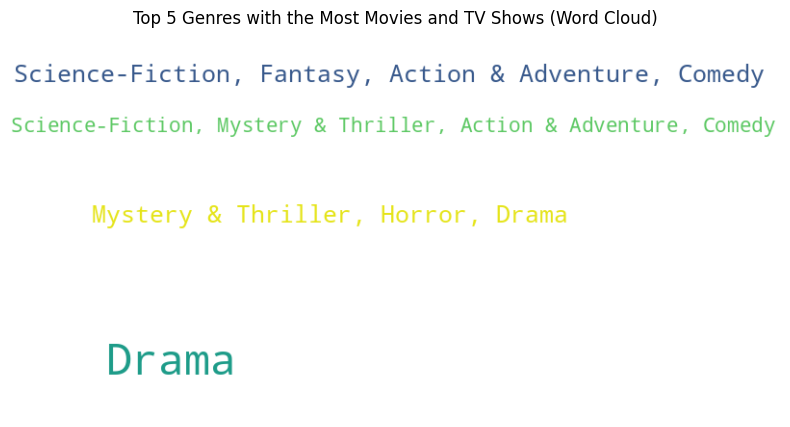

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Top_5_genres_visulalize[1:])

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Top 5 Genres with the Most Movies and TV Shows (Word Cloud)')
plt.show()


## **Finding Predominant Streaming Service**

In [57]:
# Write Your Code here
Streaming_service_counts = final_data_df['Streaming Provider'].value_counts().sort_values(ascending = False)

print(Streaming_service_counts) #First and second being NA and NaN values due to website inconsistency...

Streaming Provider
NA                       95
NaN                      94
Netflix                   3
Hotstar                   3
Hotstar,aha               1
Jio Cinema                1
Amazon Prime Video        1
Jio Cinema,Alt Balaji     1
Netflix,Sony Liv          1
Name: count, dtype: int64


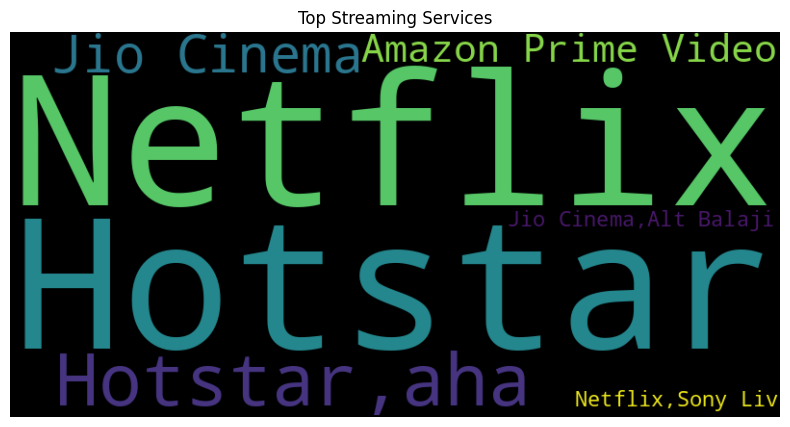

In [63]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt\

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(Streaming_service_counts[2:])

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Top Streaming Services')
plt.show()

## **Task 3 :- Data Export**

In [59]:
#saving final dataframe as Final Data in csv format
final_data_df.to_csv("Final Data.csv")

In [60]:
#saving filter data as Filter Data in csv format

#saving filter data as Filter Data in csv format
filter_data_df.to_csv("Filtered Data.csv")

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***